In [619]:
%cd /data/jupyter/root/ECNU/DataMining/L11-ImageRecog/

/data/jupyter/root/ECNU/DataMining/L11-ImageRecog


In [303]:
from __future__ import division
import os, sys

# 启动绘图
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import codecs
import csv
import warnings
warnings.filterwarnings('ignore')

# 图像预处理

## 图像切割

In [46]:
class DataSeg():
    def __init__(self):
        self.data_path = 'data/images'
        self.image_names = os.listdir(self.data_path)
        
        self.location_data_path = 'data/seglocation_images'
        if not os.path.isdir(self.location_data_path):
            os.makedirs(self.location_data_path)
            
        self.seg_data_path = 'data/seg_images'
        if not os.path.isdir(self.seg_data_path):
            os.makedirs(self.seg_data_path)
            
    def seg(self):
        print("start!")
        
        for i, image_name in enumerate(self.image_names):
            print('run %s : %f' %(image_name, i * 100 / len(self.image_names)))
            img = Image.open(os.path.join(self.data_path, image_name))
            loc_img = Image.open(os.path.join(self.data_path, image_name))
            weight, height = img.size
            
            left  = (weight / 2) - 50
            right = (weight / 2) + 51
            upper = (height / 2) - 50
            lower = (height / 2) + 51
            
            draw = ImageDraw.Draw(loc_img)
            draw.line([(left, upper), (left, lower)], fill=(255, 0, 0), width=5)
            draw.line([(left, upper), (right, upper)], fill=(255, 0, 0), width=5)
            draw.line([(right, lower), (left, lower)], fill=(255, 0, 0), width=5)
            draw.line([(right, lower), (right, upper)], fill=(255, 0, 0), width=5)
            loc_img.save(os.path.join(self.location_data_path, image_name))
            
            
            box = [left, upper, right, lower]
            seg_img = img.crop(box)
            seg_img.save(os.path.join(self.seg_data_path, image_name))

In [47]:
import time
start = time.time()

data = DataSeg()
data.seg()

end = time.time()
print('用时%4.2f 秒' %(end - start))

start!
run 3_60.jpg : 0.000000
run 4_1.jpg : 0.492611
run 4_9.jpg : 0.985222
run 4_17.jpg : 1.477833
run 3_13.jpg : 1.970443
run 2_8.jpg : 2.463054
run 1_4.jpg : 2.955665
run 2_24.jpg : 3.448276
run 1_6.jpg : 3.940887
run 3_4.jpg : 4.433498
run 1_30.jpg : 4.926108
run 2_1.jpg : 5.418719
run 5_2.jpg : 5.911330
run 2_44.jpg : 6.403941
run 3_45.jpg : 6.896552
run 3_10.jpg : 7.389163
run 3_37.jpg : 7.881773
run 3_9.jpg : 8.374384
run 1_46.jpg : 8.866995
run 3_20.jpg : 9.359606
run 2_3.jpg : 9.852217
run 4_13.jpg : 10.344828
run 4_16.jpg : 10.837438
run 4_4.jpg : 11.330049
run 3_22.jpg : 11.822660
run 2_42.jpg : 12.315271
run 1_8.jpg : 12.807882
run 4_12.jpg : 13.300493
run 3_50.jpg : 13.793103
run 2_30.jpg : 14.285714
run 3_11.jpg : 14.778325
run 1_48.jpg : 15.270936
run 3_14.jpg : 15.763547
run 4_10.jpg : 16.256158
run 4_8.jpg : 16.748768
run 2_36.jpg : 17.241379
run 3_43.jpg : 17.733990
run 3_19.jpg : 18.226601
run 1_3.jpg : 18.719212
run 5_3.jpg : 19.211823
run 2_32.jpg : 19.704433
run 

## 特征提取

In [63]:
class DataMoment():
    def __init__(self):
        self.seg_data_path = 'data/seg_images/'
        self.seg_image_names = os.listdir(self.seg_data_path)
        self.seg_image_names.sort()
        
    def moment(self):
        color_features = []
        str = ['class', 'No', 'R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']
        color_features.append(str)
        print('start moment!')
        for i, image_name in  enumerate(self.seg_image_names):
            print(image_name, i * 1.0 / len(self.seg_image_names))
            color_feature = []
            image_name_list = image_name.split('.')[0].split('_')
            color_feature.extend(image_name_list)
            
            img = Image.open(self.seg_data_path + '/' + image_name)
            r, g, b = img.split()
            r = np.array(r) / 255.0
            g = np.array(g) / 255.0
            b = np.array(b) / 255.0
            
            # Color 1 level: Mean
            r_mean = np.mean(r)
            g_mean = np.mean(g)
            b_mean = np.mean(b)
            color_feature.extend([round(r_mean, 9),
                                  round(g_mean, 9),
                                  round(b_mean, 9)])
            
            # Color 2 level: std
            r_std = np.std(r)
            g_std = np.std(g)
            b_std = np.std(b)
            color_feature.extend([round(r_std, 9),
                                  round(g_std, 9),
                                  round(b_std, 9)])
            
            
            # Color 3 level: thirdMoment
            r_skewness = np.mean((r - r_mean) ** 3)
            g_skewness = np.mean((g - g_mean) ** 3)
            b_skewness = np.mean((b - b_mean) ** 3)
            
            r_thirdMoment = np.cbrt(r_skewness)
            g_thirdMoment = np.cbrt(g_skewness)
            b_thirdMoment = np.cbrt(b_skewness)
            
            color_feature.extend([round(r_thirdMoment, 9),
                                  round(g_thirdMoment, 9),
                                  round(b_thirdMoment, 9)])
            color_features.append(color_feature)
        return color_features

In [64]:
data = DataMoment()
print('start!')
feature = data.moment()
feature

start!
start moment!
1_1.jpg 0.0
1_10.jpg 0.0049261083743842365
1_11.jpg 0.009852216748768473
1_12.jpg 0.014778325123152709
1_13.jpg 0.019704433497536946
1_14.jpg 0.024630541871921183
1_15.jpg 0.029556650246305417
1_16.jpg 0.034482758620689655
1_17.jpg 0.03940886699507389
1_18.jpg 0.04433497536945813
1_19.jpg 0.04926108374384237
1_2.jpg 0.054187192118226604
1_20.jpg 0.059113300492610835
1_21.jpg 0.06403940886699508
1_22.jpg 0.06896551724137931
1_23.jpg 0.07389162561576355
1_24.jpg 0.07881773399014778
1_25.jpg 0.08374384236453201
1_26.jpg 0.08866995073891626
1_27.jpg 0.09359605911330049
1_28.jpg 0.09852216748768473
1_29.jpg 0.10344827586206896
1_3.jpg 0.10837438423645321
1_30.jpg 0.11330049261083744
1_31.jpg 0.11822660098522167
1_32.jpg 0.12315270935960591
1_33.jpg 0.12807881773399016
1_34.jpg 0.1330049261083744
1_35.jpg 0.13793103448275862
1_36.jpg 0.14285714285714285
1_37.jpg 0.1477832512315271
1_38.jpg 0.15270935960591134
1_39.jpg 0.15763546798029557
1_4.jpg 0.1625615763546798
1_40.j

[['class', 'No', 'R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3'],
 ['1',
  '1',
  0.582764858,
  0.54351957,
  0.25127871,
  0.013075658,
  0.016571769,
  0.041060222,
  -0.012177698,
  -0.016850139,
  -0.041380707],
 ['1',
  '10',
  0.642352634,
  0.570849071,
  0.214090891,
  0.013977471,
  0.011086781,
  0.01176885,
  0.008269593,
  0.003022301,
  -0.00456113],
 ['1',
  '11',
  0.603865442,
  0.576690867,
  0.283320551,
  0.006960176,
  0.006015971,
  0.010644091,
  -0.005513677,
  -0.00281827,
  -0.010700851],
 ['1',
  '12',
  0.591890837,
  0.592854218,
  0.25101576,
  0.005501319,
  0.004952805,
  0.008056774,
  -0.003778581,
  -0.001737866,
  -0.004609379],
 ['1',
  '13',
  0.592874978,
  0.591586369,
  0.252295527,
  0.005696913,
  0.0054979,
  0.010185351,
  -0.003792858,
  -0.001312189,
  0.005535761],
 ['1',
  '14',
  0.5893536,
  0.570097511,
  0.317717794,
  0.005131898,
  0.00412787,
  0.005887019,
  -0.003914862,
  0.002243438,
  0.003737927],
 ['1',
  '15',
  0.58

In [65]:
outfile = 'data/moment_2.csv'
with open(outfile, 'w', newline='', encoding='utf-8') as out:
    csv_writer = csv.writer(out, dialect='excel')
    for f in feature:
        csv_writer.writerow(f)
print('end')

end


# 分析过程和方法

## 数据分析

In [73]:
import pandas as pd

data_file = 'data/moment_2.csv'
data_ = pd.read_csv(data_file, encoding = 'utf-8')
data_.head()

,class,No,R1,G1,B1,R2,G2,B2,R3,G3,B3
0,1,1,0.582765,0.543520,0.251279,0.013076,0.016572,0.041060,-0.012178,-0.016850,-0.041381
1,1,10,0.642353,0.570849,0.214091,0.013977,0.011087,0.011769,0.008270,0.003022,-0.004561
2,1,11,0.603865,0.576691,0.283321,0.006960,0.006016,0.010644,-0.005514,-0.002818,-0.010701
3,1,12,0.591891,0.592854,0.251016,0.005501,0.004953,0.008057,-0.003779,-0.001738,-0.004609
4,1,13,0.592875,0.591586,0.252296,0.005697,0.005498,0.010185,-0.003793,-0.001312,0.005536


## 数据分割

In [535]:
import random
# random.seed(2)
data = data_.values

data_array = []
for line in data:
    data_array.append(line.tolist())
# data_array = np.array(data_array)
pd.DataFrame(np.array(data_array)[:, 2]).describe()

,0
count,203.000000
mean,0.540036
std,0.065828
min,0.213625
25%,0.502348
50%,0.544478
75%,0.583425
max,0.700655


In [663]:
shuffle(data_array)
print(data_array[0])
data_array_ = np.array(data_array)
pd.DataFrame(data_array_[:, 2]).describe()
# data_array_[:5]
# data_array

[2.0, 16.0, 0.559619876, 0.541987618, 0.358244386, 0.036184557, 0.032012337, 0.040813904, 0.026584011, 0.021322707000000003, 0.029894967]


,0
count,203.000000
mean,0.540036
std,0.065828
min,0.213625
25%,0.502348
50%,0.544478
75%,0.583425
max,0.700655


In [667]:
p = 0.8
train = data_array_[:int(len(data) * p), :]
test = data_array_[int(len(data) * p):, :]
train[:, 2:][0]

array([0.55961988, 0.54198762, 0.35824439, 0.03618456, 0.03201234,
       0.0408139 , 0.02658401, 0.02132271, 0.02989497])

## 尝试自己实现

In [84]:
print(len(train), len(test))

162 41


### DecisionTree

In [85]:
# 构建CART决策树模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')

In [94]:
# 训练模型
tree.fit(train[:, 2:], train[:, 0]) # 训练喂数据 分别为特征和类标

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
# 保存模型
from sklearn.externals import joblib
tree_file = 'data/treemodel.pkl'
joblib.dump(tree, tree_file)

['data/treemodel.pkl']

In [96]:
# 直接预测
predict_result = tree.predict(test[:, 2:])
predict_result

array([1., 1., 3., 1., 1., 2., 3., 1., 3., 1., 3., 3., 2., 2., 3., 3., 2.,
       3., 3., 1., 3., 2., 1., 3., 3., 1., 3., 3., 2., 1., 1., 1., 1., 2.,
       3., 3., 3., 1., 3., 1., 3.])

In [98]:
test[:, 0]

array([1., 1., 3., 1., 3., 2., 3., 1., 3., 1., 3., 3., 2., 2., 3., 3., 2.,
       3., 3., 1., 4., 2., 1., 4., 4., 1., 3., 4., 2., 1., 1., 1., 3., 2.,
       3., 5., 3., 1., 3., 1., 3.])

In [101]:
# 准确率
accuracy = tree.score(test[:, 2:], test[:,0])
accuracy

0.8292682926829268

In [105]:
# 直接给出预测结果(就是可能性概率 > 0.5 认为类标为正)
predict_proba_result = tree.predict_proba(test[:, 2:])
predict_proba_result

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

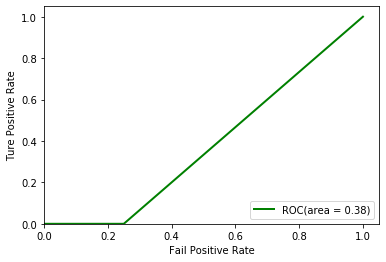

In [110]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(
    test[:, 0], 
    tree.predict_proba(test[:,2:])[:, 1],
    pos_label=1
)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2, label='ROC(area = %0.2f)' % auc, color='green')
plt.xlabel('Fail Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)bb
plt.legend(loc=4)
plt.show()


> 朴素贝叶斯不能用于连续值

In [6]:
data_['R1'].describe()

count    203.000000
mean       0.540036
std        0.065828
min        0.213625
25%        0.502348
50%        0.544478
75%        0.583425
max        0.700655
Name: R1, dtype: float64

In [7]:
data_['R2'].describe()

count    203.000000
mean       0.008203
std        0.003570
min        0.004566
25%        0.006203
50%        0.007167
75%        0.009119
max        0.036185
Name: R2, dtype: float64

## 数据变换

In [566]:
train[:, 2:][0] * 20

array([11.15850618, 10.47052288,  3.881734  ,  0.22161588,  0.15819156,
        0.21196726,  0.11219654, -0.0625663 ,  0.14536404])

In [795]:
x_train = train[:, 2:] * 3
y_train = train[:, 0].astype(int)

x_test = test[:, 2:] * 3
y_test = test[:, 0].astype(int)

In [701]:
x_test

array([[ 1.92319669e+02,  1.78598177e+02,  7.22265984e+01,
         3.44472630e+00,  2.45575140e+00,  4.18443030e+00,
         8.87634000e-01, -9.56165700e-01, -2.66310060e+00],
       [ 1.90050803e+02,  1.72514344e+02,  4.11891567e+01,
         1.93533150e+00,  1.73602500e+00,  2.85613920e+00,
        -9.16694700e-01,  5.62415400e-01, -9.63129300e-01],
       [ 1.38591142e+02,  1.44889371e+02,  9.75604467e+01,
         1.93061970e+00,  1.88668350e+00,  2.18942340e+00,
        -6.49109700e-01, -1.43295030e+00, -1.63302240e+00],
       [ 1.63340042e+02,  1.54019733e+02,  6.49672176e+01,
         1.83708750e+00,  1.60417410e+00,  2.53874220e+00,
         1.10278950e+00,  4.17048900e-01, -2.16958500e+00],
       [ 1.48053997e+02,  1.62542657e+02,  1.28998887e+02,
         2.37674430e+00,  1.96256940e+00,  3.84189450e+00,
         1.34617770e+00, -9.71663700e-01, -3.42797550e+00],
       [ 2.01201266e+02,  1.85835068e+02,  6.65713281e+01,
         1.45096230e+00,  1.47263790e+00,  2.577640

### SVM

#### 线性嫩核 linear

In [709]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
model.predict(x_test)

0.9024390243902439


array([1, 3, 2, 3, 2, 1, 4, 3, 1, 1, 2, 3, 3, 1, 4, 3, 3, 1, 2, 2, 4, 3,
       3, 2, 4, 2, 2, 2, 3, 2, 1, 3, 3, 4, 3, 3, 1, 3, 3, 1, 3])

In [706]:
y_test

array([1, 3, 2, 3, 2, 1, 4, 3, 3, 1, 2, 3, 1, 1, 4, 3, 4, 1, 2, 2, 5, 3,
       3, 2, 4, 2, 2, 2, 3, 2, 1, 3, 3, 4, 3, 3, 1, 3, 3, 1, 3])

In [707]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5)
print(scores)

[0.90909091 0.96969697 1.         0.96875    0.875     ]


#### 高斯核 rbf

In [715]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
model.predict(x_test)

0.7317073170731707


array([1, 3, 2, 3, 2, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 4, 3,
       3, 1, 3, 2, 2, 1, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3])

In [716]:
y_test

array([1, 3, 2, 3, 2, 1, 4, 3, 3, 1, 2, 3, 1, 1, 4, 3, 4, 1, 2, 2, 5, 3,
       3, 2, 4, 2, 2, 2, 3, 2, 1, 3, 3, 4, 3, 3, 1, 3, 3, 1, 3])

In [717]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5)
print(scores)

[0.78787879 0.66666667 0.78125    0.65625    0.71875   ]


### 决策树

In [812]:
print(x_test[0])
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)
print(tree.score(x_test, y_test))
tree.predict(x_test)

[ 1.92319669  1.78598177  0.72226598  0.03444726  0.02455751  0.0418443
  0.00887634 -0.00956166 -0.02663101]
0.926829268292683


array([1, 3, 2, 3, 2, 1, 4, 3, 1, 2, 2, 3, 1, 1, 5, 3, 4, 1, 2, 2, 5, 3,
       3, 2, 4, 2, 2, 2, 3, 2, 1, 3, 3, 4, 3, 3, 1, 3, 3, 1, 3])

### KNN

In [805]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(x_train, y_train)
print(kNN.score(x_test, y_test))
kNN.predict(x_test)

0.926829268292683


array([1, 3, 2, 3, 2, 1, 4, 3, 1, 1, 2, 3, 3, 1, 4, 3, 4, 1, 2, 2, 4, 3,
       3, 2, 4, 2, 2, 2, 3, 2, 1, 3, 3, 4, 3, 3, 1, 3, 3, 1, 3])